<a href="https://colab.research.google.com/github/mwithgod3952/jh_Minor_Projects/blob/main/Test_version_of_time_series_clustering_with_SOM_and_K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### ***What is clustering ?***

    - 'Clustering'은 비지도 학습 문제이며, 이를 해결하기 위한 방책이며, 
    각 데이터 포인트들 간의 '*** 유사도'에 측정 및 이에 기반하여 다수의 데이터 시리즈를 n개의 데이터 그룹으로서 분류시는 것이 학습의 목적이라 할 수 있다.

#### ***What is time series ?***

    - Time seriese 데이터는 통상 시간역의 변화에 따른 정형데이터를 다루는데, x축의 Time domain 에 따라 해당 y값의 변화를 다룬다. 

    일반의 정형데이터와는 구분되며, 이는 시간의 변화에 따른 분산의 변화이다. 이 때문에 'Classification 문제를 풀고자 할 때 분산의 변화를 고려해야 하는데, 이를 위한 전통적인 방법 중 하나가 DTW(Dynamic Time Wrapping)이다. 
    엄밀히 말하면, 근본적으로는 DWT가 분산을 고려한다고 볼 수는 없다. DTW는 단지 데이터의 패턴을 고려한 각 데이터 포인트 간 '거리'에 기반하기 때문이다.

    그렇더라도 데이터의 특정 패턴이 분산의 변화를 반영한다는 점에서 제법 유용한 해결방책이라 볼 수 있다.

In [ ]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8592 sha256=af4265e606d131befef201e5e07122aee2bde93c8d7026963ca61387fe070e23
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built MiniSom


In [ ]:
!pip install tslearn

     |████████████████████████████████| 793 kB 5.0 MB/s 


In [ ]:
 from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import glob
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [57]:
local_path = '/content/drive/MyDrive/archive'
path_names = glob.glob(local_path + "/*.csv")

multiple_df_ratail = [pd.read_csv(x) for x in path_names]

print("number of files", np.shape(path_names)) 
print("number of files in list saved", np.shape(multiple_df_ratail))

number of files (23,)
number of files in list saved (23,)


In [58]:
mySeries = []
for df in multiple_df_ratail:
    df.set_index("date", inplace=True)
    df.sort_index(inplace=True)
    df = df.loc[:,'value']
    mySeries.append(df)

namesofMySeries = [path_names[x].split('/')[-1][:-4]for x in range(len(path_names))]

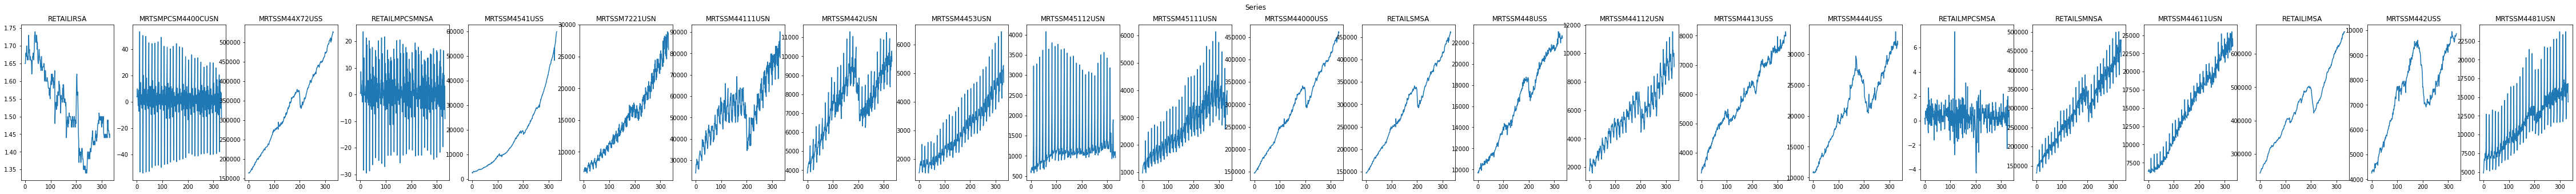

In [99]:
fig, axs = plt.subplots(1, 23, figsize=(80, 5))
fig.suptitle('Series')
for i in range(len(multiple_df_ratail)):
    axs[i].plot(mySeries[i].values)
    axs[i].set_title(namesofMySeries[i])
plt.show()

In [59]:
num = 0
sd, ed = [],[]

print("=" * 55)
for series in mySeries:
    if num < 10:
        number = str(f'0{num}')
    else:
        number = num        

    print(f"[{number}]", "start_date: ", series.index[0], ",  ", "end_date: ",series.index[-1])
    sd.append(series.index[0])
    ed.append(series.index[-1])
    num = num + 1
print("=" * 55)
print("")
print("unique values of start date", set(sd))
print("unique values of end date", set(ed)  )

[00] start_date:  1992-01-01 ,   end_date:  2019-09-01
[01] start_date:  1992-02-01 ,   end_date:  2019-09-01
[02] start_date:  1992-01-01 ,   end_date:  2019-09-01
[03] start_date:  1992-02-01 ,   end_date:  2019-09-01
[04] start_date:  1992-01-01 ,   end_date:  2019-09-01
[05] start_date:  1992-01-01 ,   end_date:  2019-09-01
[06] start_date:  1992-01-01 ,   end_date:  2019-09-01
[07] start_date:  1992-01-01 ,   end_date:  2019-09-01
[08] start_date:  1992-01-01 ,   end_date:  2019-09-01
[09] start_date:  1992-01-01 ,   end_date:  2019-09-01
[10] start_date:  1992-01-01 ,   end_date:  2019-09-01
[11] start_date:  1992-01-01 ,   end_date:  2019-09-01
[12] start_date:  1992-01-01 ,   end_date:  2019-09-01
[13] start_date:  1992-01-01 ,   end_date:  2019-09-01
[14] start_date:  1992-01-01 ,   end_date:  2019-09-01
[15] start_date:  1992-01-01 ,   end_date:  2019-09-01
[16] start_date:  1992-01-01 ,   end_date:  2019-09-01
[17] start_date:  1992-02-01 ,   end_date:  2019-09-01
[18] start

In [60]:
indices = [i for i, x in enumerate(sd) if x == "1992-02-01"]

print("** 행의 길이가 다른 리스트 내 데이터프레임의 인덱스 : ", indices)
print("** check null in all dataframe : ", sum([sum(x.isnull()) for x in mySeries]))    

** 행의 길이가 다른 리스트 내 데이터프레임의 인덱스 :  [1, 3, 17]
** check null in all dataframe :  0


In [61]:
longest_df = mySeries[0].copy()

for df_idx in indices:
    mySeries[df_idx] = mySeries[df_idx].reindex(longest_df.index)
    mySeries[df_idx].interpolate(limit_direction="both",inplace=True)

In [62]:
num = 0
sd, ed = [],[]

for series in mySeries:
    if num < 10:
        number = str(f'0{num}')
    else:
        number = num        
    sd.append(series.index[0])
    ed.append(series.index[-1])
    num = num + 1

indices = [i for i, x in enumerate(sd) if x == "1992-02-01"]
print("** 행의 길이가 다른 리스트 내 데이터프레임의 인덱스 : ", indices)
print("** check null in all dataframe : ", sum([sum(x.isnull()) for x in mySeries]))  

** 행의 길이가 다른 리스트 내 데이터프레임의 인덱스 :  []
** check null in all dataframe :  0


***scaling between 0 and 1***

In [63]:
myScaler = MinMaxScaler()
mySeries_scaled, df_scaled = [],[]

for sr in mySeries:
    sr = sr.to_frame()
    mySeries_scaled.append(sum(myScaler.fit_transform(sr).tolist(), []))
    sr['value'] = sum(myScaler.fit_transform(sr).tolist(), [])

    df_scaled.append(sr)

##### ***1) 자기조직화지도_SOM(Self-Organizing Map) 적용***

In [83]:
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(mySeries_scaled))))

som = MiniSom(som_x, som_y,len(longest_df), sigma=0.3, learning_rate = 0.1)

som.random_weights_init(mySeries_scaled)

# 50000 iteration
som.train(mySeries_scaled, 50000) 

In [102]:
def plot_som_series_averaged_center(som_x, som_y, win_map, cluster_size=(som_x*som_y)):
    fig, axs = plt.subplots(1, cluster_size, figsize=(35, 5))
    n = 0
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[n].plot(series,c="gray",alpha=0.5) 
                axs[n].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="b")
            cluster_number = x*som_y+y+1
            axs[n].set_title(f"Cluster {cluster_number}")
            n = n + 1
    plt.show()

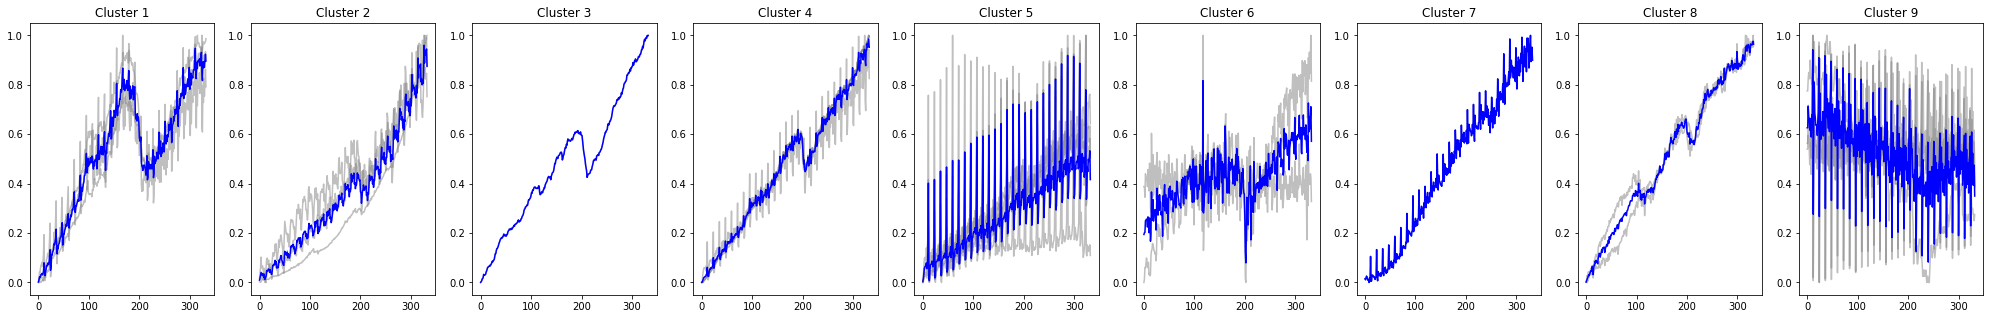

In [103]:
win_map = som.win_map(mySeries_scaled)
plot_som_series_averaged_center(som_x, som_y, win_map)